<a href="https://colab.research.google.com/github/ewst22ParkSY/ESAA11_PSY/blob/ESAA11_OB/ESAA_OB_WEEK1_1_transcript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4: 모델 훈련

### 알아볼 모델 : 회귀(선형, 다항, 로지스틱, 소프트맥스)

#### 선형회귀 훈련 방법
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구함
2. 경사하강법(GD)이라 불리는 반복적인 최적화방식을 사용해 모델파라미터를 조금씩 바꾸며 비용함수를 훈련세트에 대해 최소화

#### 다항회귀 훈련방법
1. 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과대적합되기 더 쉬움
2. 학습 곡선(learning curve)을 사용해 모델이 과대적합되는지 감지하는 방법 살피기
3. 훈련 세트의 과대적합을 감소시킬 수 있는 규제 기법을 알아봄





## 1. 선형 회귀

선형모델: 입력 특성의 가중치 합과 편향bias(또는 절편intercept)이라는 상수를 더해 예측을 만듦.

$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +... + \theta_nx_n $

- $\hat{y}은 예측값 $
- $n은 특성의 수 $
- $x_i는 i번째 특성값 $
- $\theta_j는 j번째 모델 파라미터(편향 \theta_0과 특성의 가중치 \theta_1, \theta_2, ... \theta_n을 포함$

간단히 쓸 경우:
$ \hat{y} = h_\theta(x) = \theta * x $

- $\theta는 편향 \theta_0과 \theta1에서 \theta_n까지의 특성 가중치를 담은 모델의 파라미터 벡터$
- $x는 x_0에서 x_n까지 담은 샘플의 특성 벡터. x_0는 항상 1.$
- $\theta*x는 벡터 \theta와 x의 점곱. 이는 \theta_0 x_0 + theta_1 x_1+\theta_2x_2+...+\theta_n x_n와 같음$
- $h_theta는 모델 파라미터 theta를 사용한 가설함수.$

선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 함.

선형 회귀 모델의 MSE 비용 함수
$MSE(X,h_\theta) = \frac{1}{m}\sum\limits_{i=1}^m (\theta^Tx^{i} - y^{i})^2 $

### 1.1 정규 방정식
비용 함수를 최소화하는 $\theta$값을 찾기 위한 해석적인 방법

$\hat{\theta} = (X^TX)^{-1}X^Ty$

- $\hat{\theta}은 비용 함수를 최소화하는 \theta값$
- $y는 y^{(1)}부터 y^{(m)}까지 포함하는 타깃 벡터$

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
#정규방정식을 사용해 theta hat 계산

X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.80590263],
       [3.14515751]])

In [3]:
  X_new = np.array([[0], [2]])
  X_new_b = np.c_[np.ones((2,1)), X_new]
  y_predict = X_new_b.dot(theta_best)
  y_predict

array([[ 3.80590263],
       [10.09621765]])

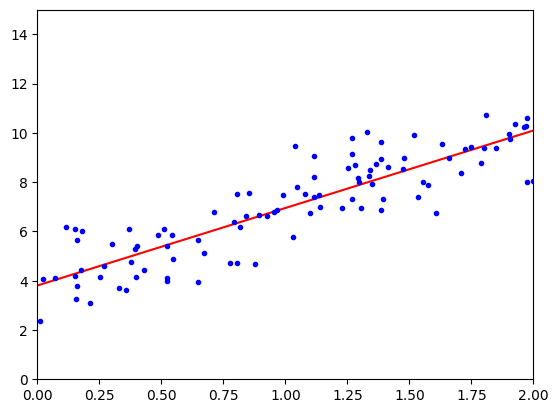

In [4]:
#선형 회귀 모델의 예측

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
# 사이킷런을 통한 선형 회귀 수행

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [6]:
lin_reg.intercept_, lin_reg.coef_

(array([3.80590263]), array([[3.14515751]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.80590263],
       [10.09621765]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.80590263],
       [3.14515751]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.80590263],
       [3.14515751]])

유사역행렬은 특잇값분해(표준 행렬 분해 기법)를 사용해 계산

## 2. 경사 하강법
> 여러 오류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘.
> 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것.

#### 중요 파라미터
- 스텝의 크기 : 학습률(learning rate) 하이퍼 파라미터로 결정

MSE 비용 함수: 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함

경사 하강법을 사용할 때는 StandardScaler와 같은 것을 사용하여 반드시 모든 특성이 같은 스케일을 갖도록 만든다.


### 2.1 배치 경사 하강법
- 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산하는 알고리

편도함수: $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산하는 함수



In [12]:
#배치 경사 하강법 알고리즘 구현

eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for itetation in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[3.80590263],
       [3.14515751]])

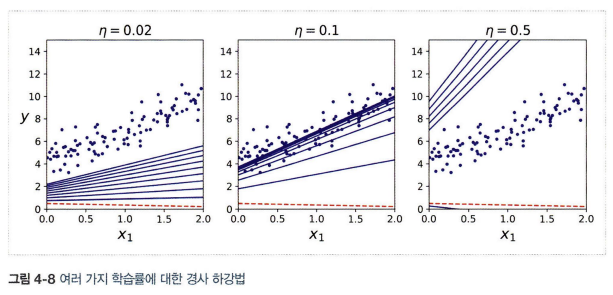

학습률을 찾는 방법: 그리드 탐색(Grid Search)
반복 횟수 지정 방법: 벡터의 노름이 허용오차보다 작아지면 경사 하강법이 최솟값에 도달한 것으로 알고리즘을 중지

### 2.2 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제: 매 스텝에서 전체 훈련 세트를 사용해 그라디언트를 계산한다는 사실 > 매우 느림.

확률적 경사 하강법: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그라디언트를 계산.

장점
- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠름
- 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음.

단점
- 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정
- 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 X

<br>

무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않음
- 해결법: 학습률을 점진적으로 감소시키는 것.

In [14]:
#확률적 경사 하강법의 구현

n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[3.80110598],
       [3.09804007]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.74962944]), array([3.10639289]))

### 2.3 미니배치 경사 하강법
: 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그라디언트를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그라디언트를 계산

장점: 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 이용해서 얻는 성능 향상.



선형 회귀를 사용한 알고리즘 비교      

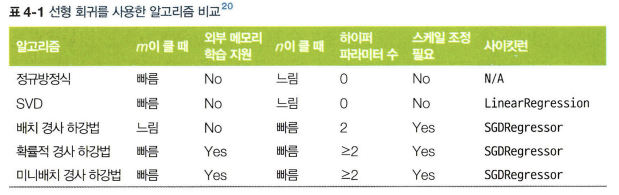

## 다항 회귀

> 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것


In [19]:
m = 100

X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [23]:
# 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.96324467]), array([0.96324467, 0.92784029]))

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.22254522]), array([[0.98728842, 0.43792737]]))

## 4. 학습 곡선

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
      model.fit(X_train[:m], y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_val_predict = model.predict(X_val)
      train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
      val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

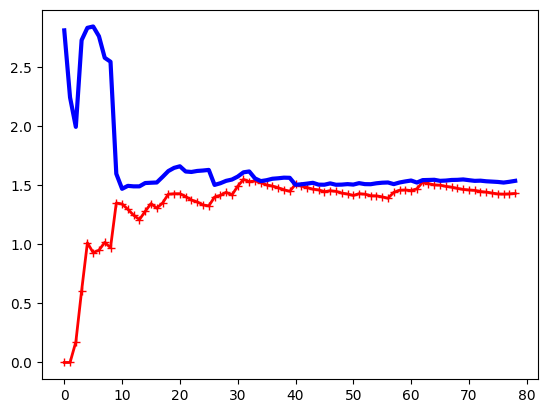

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

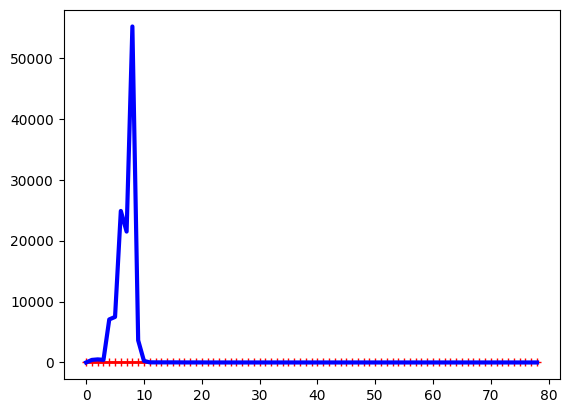

In [28]:
# 10차 다항 회귀 모델의 학습 곡선 그리기

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

편향/분산 트레이드오프

- 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실

편향: 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것. 데이터가 실제로는 2차인데 선형으로 가정하는 경우. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움.

분산: 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남. 자유도가 높은 모델(ex.고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음

줄일 수 없는 오차: 데이터 자체에 있는 잡음 때문에 발생. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것.

모델의 복잡도가 증가: 분산이 늘어나고 편향은 줄어듦.
모델의 복잡도가 감소: 편향이 커지고 분산이 작아짐.

## 5. 규제가 있는 선형 모델

- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것.
- 자유도를 줄이면 데이터에 과대적합되기 더 어려워짐

다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것

ex) '릿지', '라쏘', 엘라스틱넷 회귀